In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from scipy.stats.stats import ss
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import scorecard_function

In [47]:
import pandas as pd
import xlrd
import csv
import codecs
#xlsx转为csv
def xlsx_to_csv(path,doc_name):
    workbook = xlrd.open_workbook(path)
    table = workbook.sheet_by_index(0)
    with codecs.open(doc_name, 'w', encoding='utf-8') as f:
        write = csv.writer(f)
        for row_num in range(table.nrows):
            row_value = table.row_values(row_num)
            write.writerow(row_value)

if __name__ == '__main__':
    xlsx_to_csv('试题2数据.xlsx','data.csv')

In [48]:
#读取csv
import pandas as pd
data = pd.read_csv('data.csv')

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,16891.760500,11923.329983,0.000000,6297.250000,14943.500000,27106.500000,3.999200e+04
y,10000.0,0.199500,0.399644,0.000000,0.000000,0.000000,0.000000,1.000000e+00
city,10000.0,60.699400,42.824365,0.000000,18.000000,57.000000,96.000000,1.390000e+02
mar_status,10000.0,0.675400,0.929796,0.000000,0.000000,0.000000,2.000000,2.000000e+00
age,10000.0,33.778400,7.950498,19.000000,28.000000,32.000000,38.000000,7.400000e+01
xaccount_age,10000.0,23.422200,26.014358,1.000000,7.000000,14.000000,23.000000,1.450000e+02
cred_limit,10000.0,28197.198900,36234.316972,1.000000,6500.000000,18000.000000,35000.000000,5.000000e+05
this_bill_rate,10000.0,0.482938,0.479739,0.000000,0.111086,0.386447,0.835856,1.697924e+01
this_bill_mp,10000.0,10328.012341,16418.660196,0.000000,1613.560000,4692.610000,13298.132500,4.669180e+05
last_mp_days,10000.0,6500.546500,4668.516588,1.000000,272.000000,9999.000000,9999.000000,9.999000e+03


In [50]:
data = data.drop(['six_optial_mp_num','six_optial_mp_avg_amt'],axis=1)
# id 没什么用处 也删掉
data = data.drop(['id'],axis=1)


In [51]:
data.to_csv('data_f.csv') #转去测试集训练集区分

In [52]:
trainData=data

In [53]:
trainData = pd.read_csv('data_train.csv',index_col=0,header=0)#读训练数据
testData = pd.read_csv('data_test.csv',index_col=0,header=0)#读测试数据

In [54]:
allFeatures=trainData.drop(['y'],axis=1).columns.values.tolist()

In [55]:
allFeatures

['city',
 'mar_status',
 'age',
 'xaccount_age',
 'cred_limit',
 'this_bill_rate',
 'this_bill_mp',
 'last_mp_days',
 'six_bill_num',
 'six_bill_avg_amt',
 'six_cycle_mp_num',
 'six_cycle_mp_avg_amt',
 'six_bill_avg_debt_rate',
 'six_bill_low_repay_num',
 'epp_nbr_12m',
 'alop_nbr_12m',
 'epp_avg_amt_12m',
 'alop_avg_amt_12m',
 'consume_num_session12',
 'consume_num_session6',
 'consume_num_session3',
 'consume_num_session',
 'consume_amt_session12',
 'consume_amt_session6',
 'consume_amt_session3',
 'consume_amt_session',
 'month_avg_use_year',
 'month_avg_use_month6',
 'month_avg_use_month3']

In [56]:
############################
#   2, 分箱，计算WOE并编码   #
############################
'''
对类别型变量的分箱和WOE计算
可以通过计算取值个数的方式判断是否是类别型变量
'''
categoricalFeatures = []
numericalFeatures = []
WOE_IV_dict = {}
for var in allFeatures:
    if len(set(trainData[var])) > 7:
        numericalFeatures.append(var)
    else:
        categoricalFeatures.append(var)
not_monotone =[]
for var in categoricalFeatures:
    #检查bad rate在箱中的单调性
    if not scorecard_function.BadRateMonotone(trainData, var, 'y'):
        not_monotone.append(var)
print(not_monotone)#这些是非单调的

['six_bill_num', 'six_bill_low_repay_num']


In [57]:
categoricalFeatures

['mar_status', 'six_bill_num', 'six_cycle_mp_num', 'six_bill_low_repay_num']

In [58]:
for var in categoricalFeatures:
    print(var)
    print('\n count:',trainData.groupby([var])['y'].count())   #不需要合并
    print('\n mean:',trainData.groupby([var])['y'].mean())  
    #检查M1FreqL3M单调性


mar_status

 count: mar_status
0.0    4858
1.0     229
2.0    2413
Name: y, dtype: int64

 mean: mar_status
0.0    0.187114
1.0    0.187773
2.0    0.222959
Name: y, dtype: float64
six_bill_num

 count: six_bill_num
1.0     413
2.0     348
3.0     339
4.0     288
5.0     501
6.0    5611
Name: y, dtype: int64

 mean: six_bill_num
1.0    0.280872
2.0    0.212644
3.0    0.171091
4.0    0.131944
5.0    0.169661
6.0    0.199430
Name: y, dtype: float64
six_cycle_mp_num

 count: six_cycle_mp_num
0.0    6037
1.0     838
2.0     297
3.0     170
4.0     106
5.0      52
Name: y, dtype: int64

 mean: six_cycle_mp_num
0.0    0.119761
1.0    0.383055
2.0    0.575758
3.0    0.817647
4.0    0.849057
5.0    0.884615
Name: y, dtype: float64
six_bill_low_repay_num

 count: six_bill_low_repay_num
0.0    4628
1.0    1124
2.0     549
3.0     411
4.0     308
5.0     224
6.0     256
Name: y, dtype: int64

 mean: six_bill_low_repay_num
0.0    0.153414
1.0    0.269573
2.0    0.304189
3.0    0.270073
4.0    0.272

In [59]:
# 将 M2FreqL3M>=1的合并为一组，计算WOE和IV
trainData['mar_status_Bin'] = trainData['mar_status'].apply(lambda x: int(x>=2))
trainData.groupby(['mar_status_Bin'])['y'].mean()
WOE_IV_dict['mar_status_Bin'] = scorecard_function.CalcWOE(trainData, 'mar_status_Bin', 'y')

In [60]:
'''
对其他单调的类别型变量，检查是否有一箱的占比低于5%。 如果有，将该变量进行合并
'''
small_bin_var = []
large_bin_var = []
N = trainData.shape[0]
for var in categoricalFeatures:
    if var not in not_monotone:
        total = trainData.groupby([var])[var].count()
        pcnt = total * 1.0 / N
        if min(pcnt)<0.05:
            small_bin_var.append({var:pcnt.to_dict()})
        else:
            large_bin_var.append(var)
for i in small_bin_var:
    print (i)

{'mar_status': {0.0: 0.6477333333333334, 1.0: 0.030533333333333332, 2.0: 0.3217333333333333}}
{'six_cycle_mp_num': {0.0: 0.8049333333333333, 1.0: 0.11173333333333334, 2.0: 0.0396, 3.0: 0.02266666666666667, 4.0: 0.014133333333333333, 5.0: 0.006933333333333333}}


In [61]:
large_bin_var

[]

In [62]:
#对于M2FreqL1M、M2FreqL6M和M2FreqL12M，由于有部分箱占了很大比例，故删除
#allFeatures.remove('M2FreqL1M')
#allFeatures.remove('M2FreqL6M')
#allFeatures.remove('M2FreqL12M')
#对于small_bin_var中的其他变量，将最小的箱和相邻的箱进行合并并计算WOE
#trainData['six_cycle_mp_num_Bin'] = trainData['six_cycle_mp_num'].apply(lambda x: scorecard_function.MergeByCondition(x, ['==0', '>=1']))
#for var in ['six_cycle_mp_num_Bin']:
#    WOE_IV_dict[var] = scorecard_function.CalcWOE(trainData, var, 'y')
'''
对于不需要合并、原始箱的bad rate单调的特征，直接计算WOE和IV
'''
for var in large_bin_var:
    WOE_IV_dict[var] = scorecard_function.CalcWOE(trainData, var, 'y')

In [63]:
WOE_IV_dict

{'mar_status_Bin': {'IV': 0.010809087966866306,
  'WOE': {0: 0.07402894407667795, 1: -0.14614325034702172}}}

In [64]:
'''
对于数值型变量，需要先分箱，再计算WOE、IV
分箱的结果需要满足：
1，箱数不超过5
2，bad rate单调
3，每箱占比不低于5%
'''
bin_dict = []
for var in numericalFeatures:
    binNum = 5
    newBin = var + '_Bin'
    bin = scorecard_function.ChiMerge(trainData, var, 'y', max_interval=binNum, minBinPcnt = 0.05)
    trainData[newBin] = trainData[var].apply(lambda x: scorecard_function.AssignBin(x, bin))
    # 如果不满足单调性，就降低分箱个数
    while not scorecard_function.BadRateMonotone(trainData, newBin, 'y'):
        binNum -= 1
        bin = scorecard_function.ChiMerge(trainData, var, 'y', max_interval=binNum, minBinPcnt=0.05)
        trainData[newBin] = trainData[var].apply(lambda x: scorecard_function.AssignBin(x, bin))
    WOE_IV_dict[newBin] = scorecard_function.CalcWOE(trainData, newBin, 'y')
    bin_dict.append({var:bin})

In [65]:
#pd.DataFrame(WOE_IV_dict).sort()

In [66]:
bin_dict

[{'city': [68.0]},
 {'age': [26.0]},
 {'xaccount_age': [1.0, 16.0]},
 {'cred_limit': [6000.0, 11500.0, 42500.0]},
 {'this_bill_rate': [0.152442059]},
 {'this_bill_mp': [6588.73]},
 {'last_mp_days': [30.0, 119.0, 350.0]},
 {'six_bill_avg_amt': [1803.59]},
 {'six_cycle_mp_avg_amt': [0.0]},
 {'six_bill_avg_debt_rate': [0.1124175, 0.577353669, 1.334615143]},
 {'epp_nbr_12m': [0.0, 1.0, 3.0]},
 {'alop_nbr_12m': [0.0, 2.0]},
 {'epp_avg_amt_12m': [0.0, 416.67, 1362.58]},
 {'alop_avg_amt_12m': [0.0, 416.67]},
 {'consume_num_session12': [22.0, 69.0]},
 {'consume_num_session6': [0.0, 21.0]},
 {'consume_num_session3': [0.0]},
 {'consume_num_session': [0.0, 8.0]},
 {'consume_amt_session12': [9307.27, 35517.29]},
 {'consume_amt_session6': [100.0]},
 {'consume_amt_session3': [478.0]},
 {'consume_amt_session': [297.23]},
 {'month_avg_use_year': [0.108342778]},
 {'month_avg_use_month6': [0.066212545]},
 {'month_avg_use_month3': [0.081048462]}]

In [67]:
%matplotlib inline

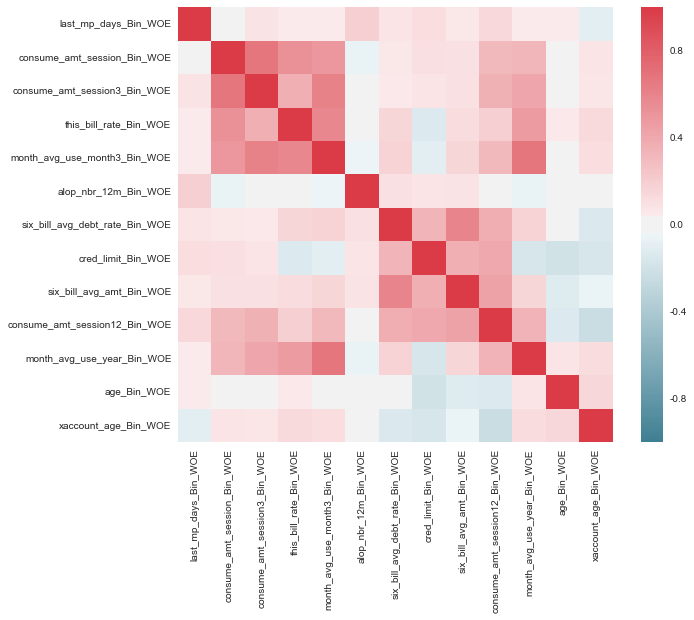

In [68]:
##############################
#   3, 单变量分析和多变量分析   #
##############################
#  选取IV高于0.02的变量
high_IV = [(k,v['IV']) for k,v in WOE_IV_dict.items() if v['IV'] >= 0.02]
high_IV_sorted = sorted(high_IV, key=lambda k: k[1],reverse=True)
for (var,iv) in high_IV:
    newVar = var+"_WOE"
    trainData[newVar] = trainData[var].map(lambda x: WOE_IV_dict[var]['WOE'][x])
'''
多变量分析：比较两两线性相关性。如果相关系数的绝对值高于阈值，剔除IV较低的一个
'''
deleted_index = []
cnt_vars = len(high_IV_sorted)
for i in range(cnt_vars):
    if i in deleted_index:
        continue
    x1 = high_IV_sorted[i][0]+"_WOE"
    for j in range(cnt_vars):
        if i == j or j in deleted_index:
            continue
        y1 = high_IV_sorted[j][0]+"_WOE"
        roh = np.corrcoef(trainData[x1],trainData[y1])[0,1]
        if abs(roh)>0.7:
            x1_IV = high_IV_sorted[i][1]
            y1_IV = high_IV_sorted[j][1]
            if x1_IV > y1_IV:
                deleted_index.append(j)
            else:
                deleted_index.append(i)

single_analysis_vars = [high_IV_sorted[i][0]+"_WOE" for i in range(cnt_vars) if i not in deleted_index]


X = trainData[single_analysis_vars]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [69]:
'''
多变量分析：VIF
'''
# X = np.matrix(trainData[single_analysis_vars])
# VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
# print (max(VIF_list))
# 最大的VIF是 3.429，小于10，因此这一步认为没有多重共线性
multi_analysis = single_analysis_vars

In [70]:
################################
#   4, 建立逻辑回归模型预测违约   #
################################
X = trainData[multi_analysis]
X['intercept'] = [1] * X.shape[0]
y = trainData['y']
logit = sm.Logit(y, X)
logit_result = logit.fit()
pvalues = logit_result.pvalues
params = logit_result.params
fit_result = pd.concat([params,pvalues],axis=1)
fit_result.columns = ['coef','p-value']
fit_result = fit_result.sort_values(by = 'coef')
print(fit_result)

Optimization terminated successfully.
         Current function value: 0.379299
         Iterations 8
                                    coef        p-value
xaccount_age_Bin_WOE           -1.755202   7.718579e-17
intercept                      -1.409047   0.000000e+00
last_mp_days_Bin_WOE           -1.083893  3.269726e-217
consume_amt_session_Bin_WOE    -0.846170   1.761911e-18
cred_limit_Bin_WOE             -0.734445   3.256768e-03
age_Bin_WOE                    -0.714761   1.189952e-03
this_bill_rate_Bin_WOE         -0.714437   3.145599e-13
alop_nbr_12m_Bin_WOE           -0.576518   1.756985e-07
six_bill_avg_amt_Bin_WOE       -0.412734   1.233817e-01
consume_amt_session3_Bin_WOE   -0.400916   1.699206e-03
six_bill_avg_debt_rate_Bin_WOE -0.287856   2.324421e-01
month_avg_use_month3_Bin_WOE   -0.223934   1.533585e-01
consume_amt_session12_Bin_WOE   0.865834   1.911092e-03
month_avg_use_year_Bin_WOE      1.216020   1.052019e-04


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


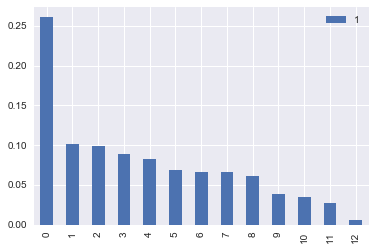

In [100]:
clf = ensemble.GradientBoostingClassifier()
gbdt_model = clf.fit(X, y)
importace = gbdt_model.feature_importances_.tolist()
featureImportance = zip(multi_analysis,importace)
featureImportanceSorted = sorted(featureImportance, key=lambda k: k[1],reverse=True)
pd.DataFrame(featureImportanceSorted).plot(kind='bar')

In [101]:
# 先假定模型可以容纳4个特征，再逐步增加特征个数，直到有特征的系数为正，或者p值超过0.1
n = 4
featureSelected = [i[0] for i in featureImportanceSorted[:n]]
X_train = X[featureSelected+['intercept']]
logit = sm.Logit(y, X_train)
logit_result = logit.fit()
pvalues = logit_result.pvalues
params = logit_result.params
fit_result = pd.concat([params,pvalues],axis=1)
fit_result.columns = ['coef','p-value']
'''
                              coef       p-value
maxDelqL3M_Bin_WOE       -0.895654  0.000000e+00
increaseUrateL6M_Bin_WOE -1.084713  1.623441e-84
M0FreqL3M_WOE            -0.436273  1.556517e-74
avgUrateL1M_Bin_WOE      -0.629355  7.146665e-16
avgUrateL3M_Bin_WOE      -0.570670  8.207241e-12
intercept                -1.831752  0.000000e+00
'''
while(n<len(featureImportanceSorted)):
    nextVar = featureImportanceSorted[n][0]
    featureSelected = featureSelected + [nextVar]
    X_train = X[featureSelected+['intercept']]
    logit = sm.Logit(y, X_train)
    logit_result = logit.fit()
    params = logit_result.params
    print ("current var is ",nextVar,'   ', params[nextVar])
    if max(params) < 0:
        n += 1
    else:
        featureSelected.remove(nextVar)
        n += 1

X_train = X[featureSelected+['intercept']]
logit = sm.Logit(y, X_train)
logit_result = logit.fit()
pvalues = logit_result.pvalues
params = logit_result.params
fit_result = pd.concat([params,pvalues],axis=1)
fit_result.columns = ['coef','p-value']
fit_result = fit_result.sort_values(by  = 'p-value')
print(fit_result)

Optimization terminated successfully.
         Current function value: 0.402445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.400897
         Iterations 7
current var is  cred_limit_Bin_WOE     -1.0932706654646651
Optimization terminated successfully.
         Current function value: 0.400575
         Iterations 7
current var is  alop_nbr_12m_Bin_WOE     -0.5606298436904464
Optimization terminated successfully.
         Current function value: 0.389443
         Iterations 7
current var is  consume_amt_session_Bin_WOE     -1.063593727399953
Optimization terminated successfully.
         Current function value: 0.402068
         Iterations 7
current var is  month_avg_use_year_Bin_WOE     0.584472260066999
Optimization terminated successfully.
         Current function value: 0.396984
         Iterations 7
current var is  xaccount_age_Bin_WOE     -1.914966541459017
Optimization terminated successfully.
         Current function value: 0.401

In [102]:
X2 = X[featureSelected+['intercept']]
for alpha in range(100,0,-1):
    l1_logit = sm.Logit.fit_regularized(sm.Logit(y, X2), start_params=None, method='l1', alpha=alpha)
    pvalues = l1_logit.pvalues
    params = l1_logit.params
    if max(pvalues)>=0.1 or max(params)>0:
        break

bestAlpha = alpha + 1
l1_logit = sm.Logit.fit_regularized(sm.Logit(y, X2), start_params=None, method='l1', alpha=bestAlpha)
params = l1_logit.params
params2 = params.to_dict()
featuresInModel = [k for k, v in params2.items() if k!='intercept' and v < -0.0000001]
print(featuresInModel)

X_train = X[featuresInModel + ['intercept']]
logit = sm.Logit(y, X_train)
logit_result = logit.fit()
trainData['pred'] = logit_result.predict(X_train)

ks = scorecard_function.KS(trainData, 'pred', 'y')
auc = roc_auc_score(trainData['y'],trainData['pred'])  #AUC = 0.73
#{'AUC': 0.83644931044825688, 'KS': 0.59816049348012412}
print(ks, auc)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.44450790599514384
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.444141522688523
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.44377429798666335
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4434062290570958
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.44303731304707883
            Iterations: 19
            Funct

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43663327077326464
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4362485951177663
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43586301404191247
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.435476524241195
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43508912238596353
            Iterations: 19
            Funct

ValueError: 'pred' is both an index level and a column label, which is ambiguous.

n=4 0.438961864374 0.785623678184
['six_cycle_mp_num_Bin_WOE',
 'epp_nbr_12m_Bin_WOE',
 'this_bill_rate_Bin_WOE',
 'consume_amt_session_Bin_WOE']
n=5  0.438961864374 0.785623678184
n=6 
['six_cycle_mp_num_Bin_WOE', 'epp_nbr_12m_Bin_WOE', 'this_bill_rate_Bin_WOE']
n=8
0.427952767615 0.767721802946

In [ ]:
featuresInModel

In [ ]:
##################################
#   5，在测试集上测试逻辑回归的结果   #
###################################
# 准备WOE编码后的变量
modelFeatures = [i.replace('_Bin','').replace('_WOE','') for i in featuresInModel]

numFeatures = [i for i in modelFeatures if i in numericalFeatures]
charFeatures = [i for i in modelFeatures if i in categoricalFeatures]


In [ ]:
numFeatures

In [103]:
charFeatures

NameError: name 'charFeatures' is not defined

In [104]:
testData = pd.read_csv('data.csv')

In [105]:
testData['mar_status_Bin'] = testData['mar_status'].apply(lambda x: x)

for var in numFeatures:
        newBin = var+"_Bin"
        bin = list([i.values() for i in bin_dict if var in i][0])[0]
        testData[newBin] = testData[var].apply(lambda x: scorecard_function.AssignBin(x, bin))

finalFeatures = [i+'_Bin' for i in numFeatures] #+ ['M2FreqL3M_Bin','maxDelqL1M_Bin','maxDelqL3M_Bin','M0FreqL3M']
for var in finalFeatures:
    var2 = var+"_WOE"
    testData[var2] = testData[var].apply(lambda x: WOE_IV_dict[var]['WOE'][x])

X_test = testData[featuresInModel]
X_test['intercept'] = [1]*X_test.shape[0]
testData['pred'] = logit_result.predict(X_test)


ks = scorecard_function.KS(testData, 'pred', 'y')
auc = roc_auc_score(testData['y'],testData['pred'])
print(ks, auc)

NameError: name 'numFeatures' is not defined

In [106]:
##########################
#   6，在测试集上计算分数 #
##########################
BasePoint, PDO = 500,50
testData['score'] = testData['pred'].apply(lambda x: scorecard_function.Prob2Score(x, BasePoint, PDO))
plt.hist(testData['score'],bins=10)
plt.show()

KeyError: 'pred'